# Equation of State

Density ($\rho$) is a key parameter in determining fluid flow in the ocean. For example, it plays a role in the pressure gradient force:
$$
F_{\text{pressure gradient}} = -\frac{1}{\rho}\nabla p
$$
where $p$ is the pressure.

Density itself is a function of temperature, salinity, and pressure: $\rho = f(T,S,p)$. This relationship, called the **equation of state** has been drived by measuring the density of seawater in a laboratory setting across a wide range of temperature, salinity, and pressure values. 

Given its fundamental role relating key ocean properties, the equation of state is used often oceanography and has been implemented in toolboxes in various languages. In Python, we can access this relationship using the Gibbs Seawater Toolbox (gsw) and use it to examine density in temperature and salinity space:

In [1]:
import gsw
import matplotlib.pyplot as plt
import numpy as np

Lets define a range of parameters to examine the relationship:

In [2]:
# define parameters in common units
pressure = 5 # dbar
practical_salinity = np.linspace(32.5,36) # psu
potential_temperature = np.linspace(2,30) # degrees C
longitude = 0 # degrees
latitude = 0 # degrees

# convert to units used in density approximation
absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

# make a 2D mesh grid of salinity and temperature for plotting
Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

# compute density from salinity and temperature
Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)

Next, we can create a typical temperature-salinity plot, typically called a **T-S diagram**:

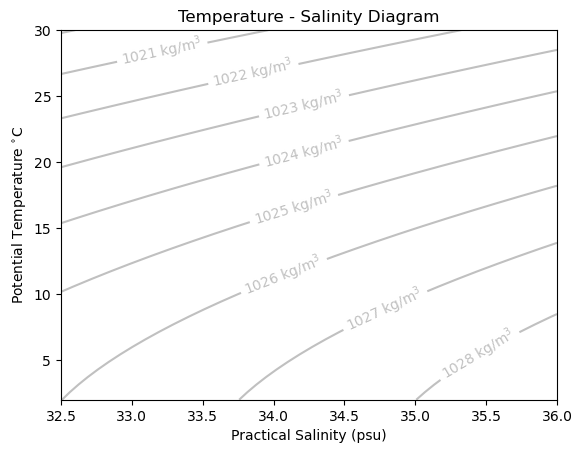

In [3]:
fig = plt.figure()
C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1020,1029))
plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                 fmt = lambda d : str(round(d))+' kg/m$^3$')
plt.ylabel('Potential Temperature $^{\circ}$C')
plt.xlabel('Practical Salinity (psu)')
plt.title('Temperature - Salinity Diagram')
plt.show()

By examining the density contours in temperature-salinity space, we observe that the density of typical ocean water lies in the range of 1020 to 1030 kg/m$^3$. Since the 1000 is constant, it is often substracted as a reference density $\rho_0$ and the density is plotted in terms of $sigma = \rho - \rho_0$.

We also observe that the function is typically not linear - especially at lower temperatures and salinities, which are typical of many locations in the Arctic. Given this locally linear nature of the equation of state, it is commonly expressed in terms of expansion and contraction coefficients $\alpha$ and $\beta$ for temperature and salinity, respectively:
$$
\Delta \rho = \alpha \Delta \Theta \text{ and } \Delta \rho = \beta \Delta S
$$